In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/data.csv"
data = pd.read_csv(file_path, encoding='latin1')

# Inspect the data
print(data.head())
print(data.info())
print(data.describe().T)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

In [3]:
import warnings

# Suppress specific warning
warnings.filterwarnings("ignore", category=UserWarning)

# Now the warnings of this type will be ignored


In [4]:
data_no_null= data.dropna(subset=['Description', 'CustomerID']).copy()

# Verify the shape after removing null values
print(data_no_null.info())
print(data_no_null.head())
print(data_no_null.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLL

In [5]:
# Remove duplicates
data_no_duplicates = data_no_null.drop_duplicates()

# Verify the shape after removing duplicates
print(data_no_duplicates.info())
print(data_no_duplicates.head())

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLL

In [6]:
# Remove rows where Quantity or UnitPrice is negative or zero
data_no_anomalies = data_no_duplicates[(data_no_duplicates['Quantity'] > 0) & (data_no_duplicates['UnitPrice'] > 0)].copy()

# Verify the shape after handling anomalies
print(data_no_anomalies.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB
None


In [7]:
# Remove rows where UnitPrice is less than or equal to zero
data_no_negative_prices = data_no_anomalies[data_no_anomalies['UnitPrice'] > 0].copy()

# Verify the shape after handling negative prices
print(data_no_negative_prices.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB
None


In [8]:
# Check unique values in 'UnitPrice' to verify that there are no negative or zero values
print(data_no_negative_prices['UnitPrice'].describe())

# Optionally, check if there are any zero or negative values remaining
print(data_no_negative_prices[data_no_negative_prices['UnitPrice'] <= 0])

count    392692.000000
mean          3.125914
std          22.241836
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64
Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [9]:
# Get summary statistics of the numerical columns
print(data_no_negative_prices.describe())

            Quantity      UnitPrice     CustomerID
count  392692.000000  392692.000000  392692.000000
mean       13.119702       3.125914   15287.843865
std       180.492832      22.241836    1713.539549
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13955.000000
50%         6.000000       1.950000   15150.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000    8142.750000   18287.000000


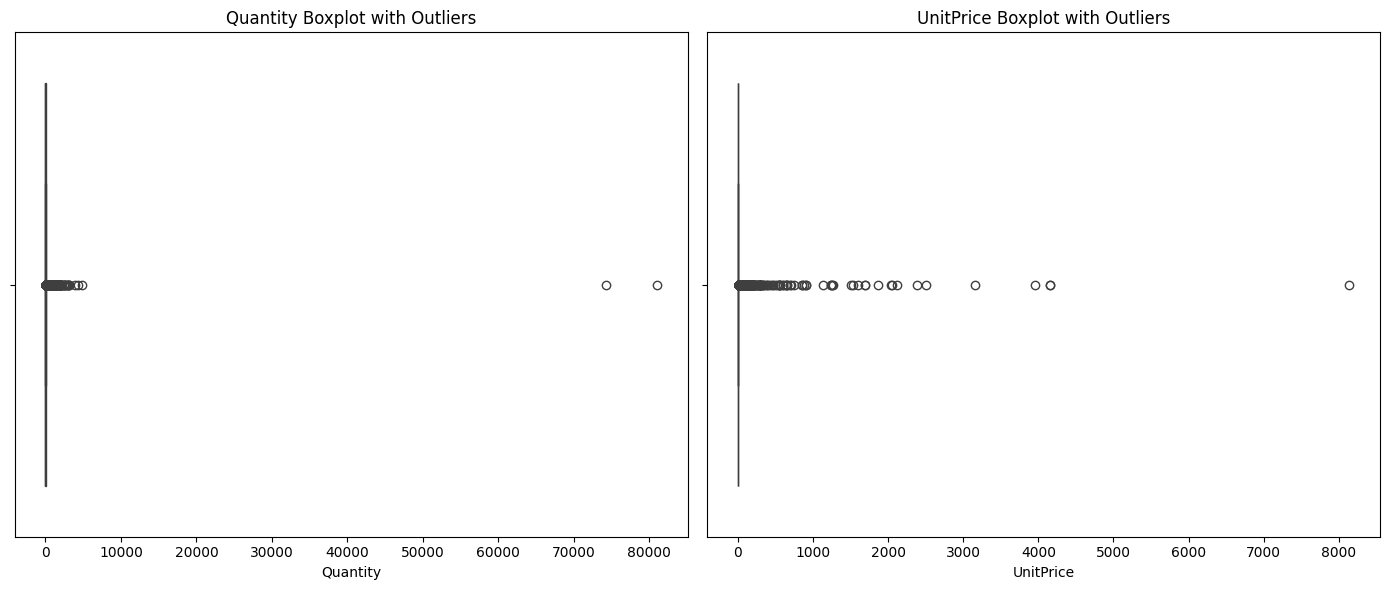

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for detecting outliers in 'Quantity' and 'UnitPrice'
plt.figure(figsize=(14, 6))

# Boxplot for 'Quantity'
plt.subplot(1, 2, 1)
sns.boxplot(data=data_no_negative_prices, x='Quantity')
plt.title('Quantity Boxplot with Outliers')

# Boxplot for 'UnitPrice'
plt.subplot(1, 2, 2)
sns.boxplot(data=data_no_negative_prices, x='UnitPrice')
plt.title('UnitPrice Boxplot with Outliers')

plt.tight_layout()
plt.show()


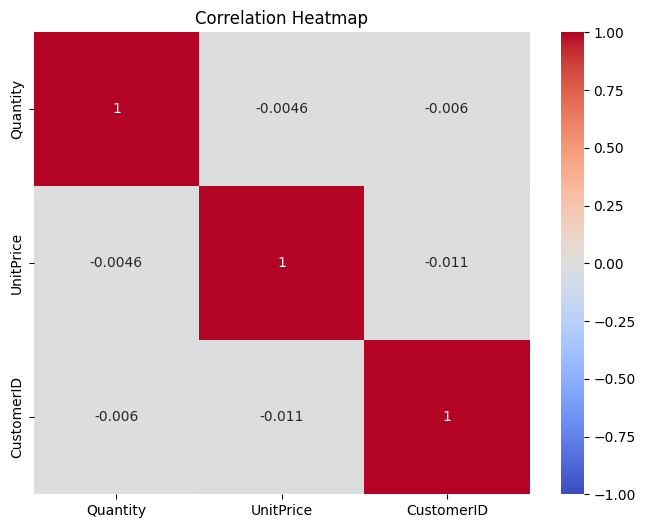

In [12]:
# Compute correlation matrix
corr = data_no_negative_prices[['Quantity', 'UnitPrice', 'CustomerID']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


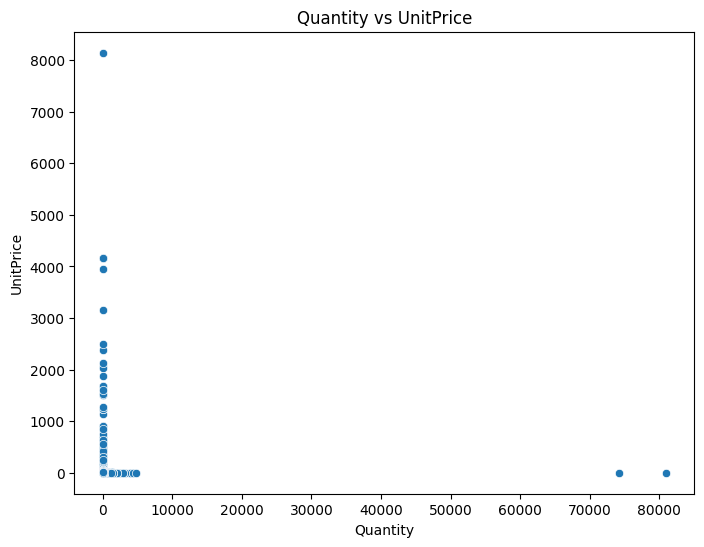

In [13]:
# Scatter plot between 'Quantity' and 'UnitPrice'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_no_negative_prices['Quantity'], y=data_no_negative_prices['UnitPrice'])
plt.title('Quantity vs UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

In [14]:
# Function to cap outliers based on IQR method
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the values that are outside the bounds
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

# Cap outliers in 'Quantity' and 'UnitPrice'
data_capped_quantity = cap_outliers_iqr(data_no_negative_prices, 'Quantity')
data_capped = cap_outliers_iqr(data_capped_quantity, 'UnitPrice')

# Verify the shape of the data after capping outliers
print(f"Shape after capping outliers: {data_capped.shape}")

Shape after capping outliers: (392692, 8)


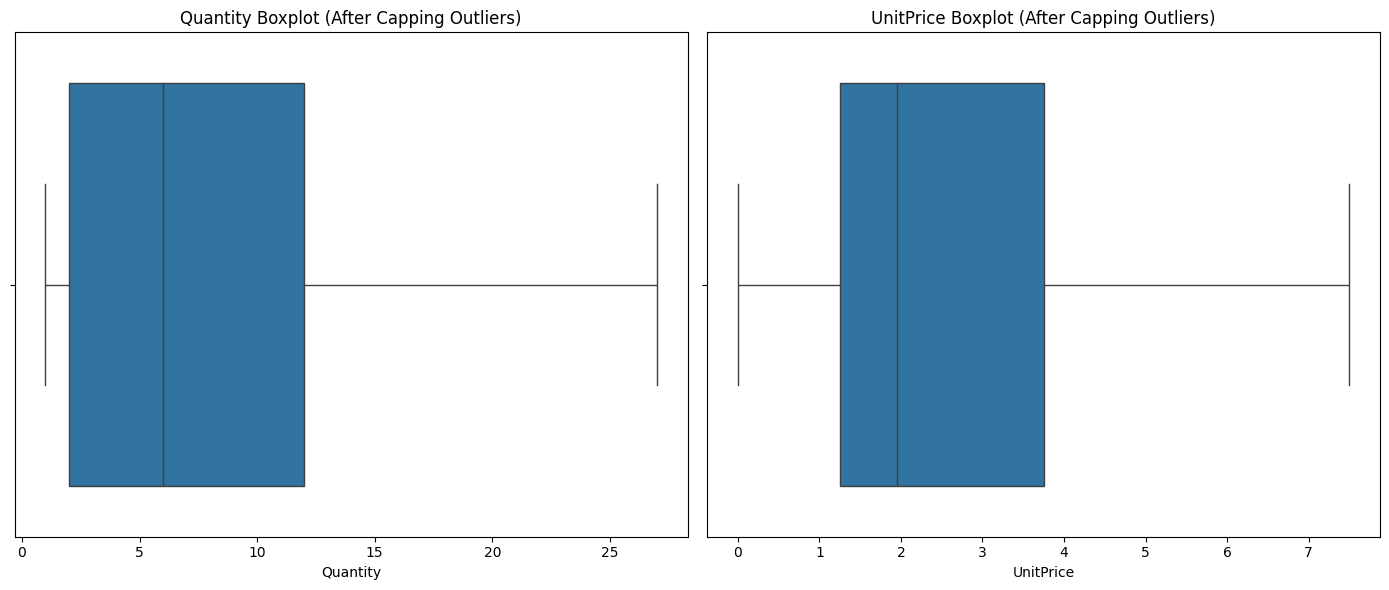

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for 'Quantity' and 'UnitPrice' after handling outliers
plt.figure(figsize=(14, 6))

# Boxplot for 'Quantity'
plt.subplot(1, 2, 1)
sns.boxplot(data=data_capped, x='Quantity')
plt.title('Quantity Boxplot (After Capping Outliers)')

# Boxplot for 'UnitPrice'
plt.subplot(1, 2, 2)
sns.boxplot(data=data_capped, x='UnitPrice')
plt.title('UnitPrice Boxplot (After Capping Outliers)')

plt.tight_layout()
plt.show()

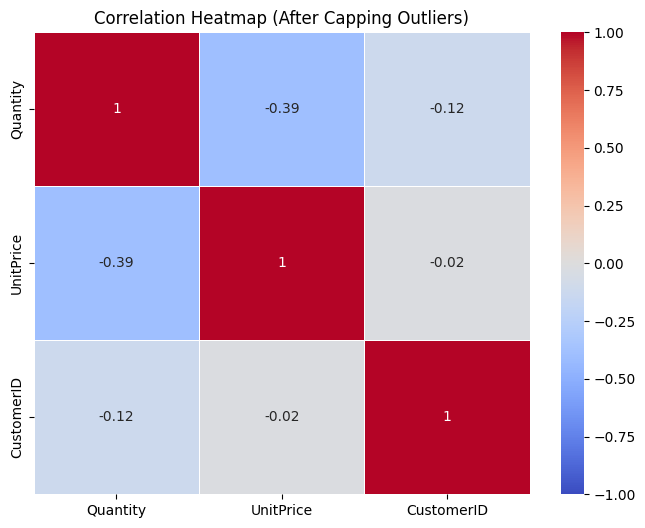

In [16]:
# Select only numeric columns for the correlation heatmap
numeric_cols = ['Quantity', 'UnitPrice', 'CustomerID']  # You can include other numerical columns if applicable

# Calculate the correlation matrix
correlation_matrix = data_capped[numeric_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap (After Capping Outliers)')
plt.show()

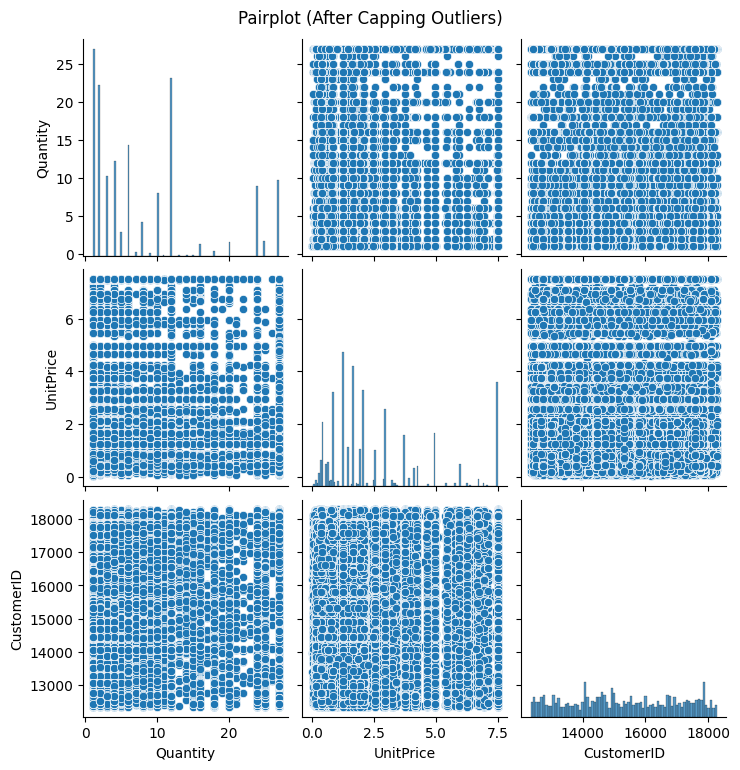

In [17]:
# Pairplot to visualize relationships between selected numerical features
sns.pairplot(data_capped[numeric_cols])
plt.suptitle('Pairplot (After Capping Outliers)', y=1.02)
plt.show()


In [18]:
print(data_capped.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB
None


In [19]:
# Copy the current data to avoid confusion
data_total_price = data_capped.copy()

# Create the 'TotalPrice' feature
data_total_price['TotalPrice'] = data_total_price['Quantity'] * data_total_price['UnitPrice']

# Check the new feature
print(data_total_price.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom       15.30  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom       22.00  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom       20.34  


In [20]:
# Copy the data for invoice date feature extraction
data_invoice_date = data_total_price.copy()

# Convert InvoiceDate to datetime
data_invoice_date['InvoiceDate'] = pd.to_datetime(data_invoice_date['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Extract additional features from InvoiceDate
data_invoice_date['DayOfWeek'] = data_invoice_date['InvoiceDate'].dt.dayofweek
data_invoice_date['HourOfDay'] = data_invoice_date['InvoiceDate'].dt.hour
data_invoice_date['Month'] = data_invoice_date['InvoiceDate'].dt.month
data_invoice_date['Year'] = data_invoice_date['InvoiceDate'].dt.year

# Check the newly extracted features
print(data_invoice_date[['InvoiceDate', 'DayOfWeek', 'HourOfDay', 'Month', 'Year']].head())

          InvoiceDate  DayOfWeek  HourOfDay  Month  Year
0 2010-12-01 08:26:00          2          8     12  2010
1 2010-12-01 08:26:00          2          8     12  2010
2 2010-12-01 08:26:00          2          8     12  2010
3 2010-12-01 08:26:00          2          8     12  2010
4 2010-12-01 08:26:00          2          8     12  2010


In [21]:
print(data_invoice_date.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   TotalPrice   392692 non-null  float64       
 9   DayOfWeek    392692 non-null  int32         
 10  HourOfDay    392692 non-null  int32         
 11  Month        392692 non-null  int32         
 12  Year         392692 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(4), int64(1), object(4)
memory usage: 36.0+ MB
None


In [22]:
# Copy the data for RFM feature engineering
data_rfm = data_invoice_date.copy()

# Calculate Recency, Frequency, and Monetary for each customer
rfm_metrics = data_rfm.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda x: (x.max() - x.min()).days),  # Days since last purchase
    Frequency=('InvoiceNo', 'nunique'),  # Count of unique purchases
    Monetary=('TotalPrice', 'sum')  # Total monetary value spent by customer
).reset_index()

# Merge the RFM metrics back into the data_rfm dataframe
data_rfm = data_rfm.merge(rfm_metrics, on='CustomerID', how='left')

# Check the data with RFM features
print(data_rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary']].head())

   CustomerID  Recency  Frequency  Monetary
0     17850.0        1         34   4904.66
1     17850.0        1         34   4904.66
2     17850.0        1         34   4904.66
3     17850.0        1         34   4904.66
4     17850.0        1         34   4904.66


In [23]:
print(data_rfm.head())
print(data_rfm.info())
print(data_rfm.isnull().sum())
print(data_rfm.nunique())
print(data_rfm.columns)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   DayOfWeek  HourOfDay  Month  Year  Recency  Frequency  Monetary  
0          2          8     12  2010     

In [24]:
# Step 1: Copy the original data for segmentation
data_rfm_segmentation = data_rfm.copy()

# Step 2: Create customer segments based on Recency, Frequency, and Monetary
data_rfm_segmentation['Customer_Segment'] = 'Low-Value'  # Default segment

# Define segmentation conditions
data_rfm_segmentation.loc[
    (data_rfm_segmentation['Recency'] < 30) &
    (data_rfm_segmentation['Frequency'] > 10) &
    (data_rfm_segmentation['Monetary'] > 1000), 'Customer_Segment'] = 'High-Value'

data_rfm_segmentation.loc[
    (data_rfm_segmentation['Recency'] > 180), 'Customer_Segment'] = 'Inactive'

# Preview the result
print(data_rfm_segmentation[['Recency', 'Frequency', 'Monetary', 'Customer_Segment']].head())

   Recency  Frequency  Monetary Customer_Segment
0        1         34   4904.66       High-Value
1        1         34   4904.66       High-Value
2        1         34   4904.66       High-Value
3        1         34   4904.66       High-Value
4        1         34   4904.66       High-Value


In [25]:
print(data_rfm_segmentation.head())
print(data_rfm_segmentation.info())
print(data_rfm_segmentation.isnull().sum())
print(data_rfm_segmentation.nunique())
print(data_rfm_segmentation.columns)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   DayOfWeek  HourOfDay  Month  Year  Recency  Frequency  Monetary  \
0          2          8     12  2010    

In [26]:
import pandas as pd

# Step 1: Ensure the data is sorted by CustomerID and InvoiceDate
data_target_variable = data_rfm_segmentation.copy()  # Replace with your actual dataframe
data_target_variable = data_target_variable.sort_values(by=['CustomerID', 'InvoiceDate'])

# Step 2: Reset the index to avoid confusion due to old index values
#data_target_variable.reset_index(drop=True, inplace=True)

# Step 3: Shift the 'InvoiceDate' to create 'Next_Purchase_Date' for each customer
data_target_variable['Next_Purchase_Date'] = data_target_variable.groupby('CustomerID')['InvoiceDate'].shift(-1)

# Step 4: Fill NaT values in 'Next_Purchase_Date' (i.e., no next purchase)
data_target_variable['Next_Purchase_Date'].fillna(pd.Timestamp('2100-12-31'), inplace=True)  # Use a far future date

# Step 5: Calculate 'Purchase_Behavior' based on whether the next purchase date is within 30 days
data_target_variable['Purchase_Behavior'] = data_target_variable.apply(
    lambda row: 1 if ((row['Next_Purchase_Date'] - row['InvoiceDate']).days <= 30)
               else 0, axis=1)

# Step 6: Drop unnecessary columns
data_target_variable.drop(columns=['Next_Purchase_Date'], inplace=True)

# Step 7: Display the final result with relevant columns
print(data_target_variable[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Purchase_Behavior']].head())

<ipython-input-26-0d25bd4e5bc7>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_target_variable['Next_Purchase_Date'].fillna(pd.Timestamp('2100-12-31'), inplace=True)  # Use a far future date


       CustomerID  Recency  Frequency  Monetary  Purchase_Behavior
36521     12346.0        0          1     28.08                  0
10256     12347.0      365          7   3877.44                  1
10257     12347.0      365          7   3877.44                  1
10258     12347.0      365          7   3877.44                  1
10259     12347.0      365          7   3877.44                  1


In [27]:
print(data_target_variable.head())
print(data_target_variable.info())
print(data_target_variable.columns)

      InvoiceNo StockCode                        Description  Quantity  \
36521    541431     23166     MEDIUM CERAMIC TOP STORAGE JAR        27   
10256    537626     85116    BLACK CANDELABRA T-LIGHT HOLDER        12   
10257    537626     22375  AIRLINE BAG VINTAGE JET SET BROWN         4   
10258    537626     71477  COLOUR GLASS. STAR T-LIGHT HOLDER        12   
10259    537626     22492            MINI PAINT SET VINTAGE         27   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
36521 2011-01-18 10:01:00       1.04     12346.0  United Kingdom       28.08   
10256 2010-12-07 14:57:00       2.10     12347.0         Iceland       25.20   
10257 2010-12-07 14:57:00       4.25     12347.0         Iceland       17.00   
10258 2010-12-07 14:57:00       3.25     12347.0         Iceland       39.00   
10259 2010-12-07 14:57:00       0.65     12347.0         Iceland       17.55   

       DayOfWeek  HourOfDay  Month  Year  Recency  Frequency  Monetary  \


In [28]:
# Copy the current DataFrame to a new DataFrame
data_target_variable_dropped = data_target_variable.copy()

# Drop the specified columns
columns_to_drop = ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']
data_target_variable_dropped.drop(columns=columns_to_drop, inplace=True)

# Preview the updated DataFrame
print(data_target_variable_dropped.head())
print(data_target_variable_dropped.info())
print(data_target_variable_dropped.isnull().sum())
print(data_target_variable_dropped.nunique())
print(data_target_variable_dropped.columns)

       Quantity  UnitPrice  CustomerID  TotalPrice  DayOfWeek  HourOfDay  \
36521        27       1.04     12346.0       28.08          1         10   
10256        12       2.10     12347.0       25.20          1         14   
10257         4       4.25     12347.0       17.00          1         14   
10258        12       3.25     12347.0       39.00          1         14   
10259        27       0.65     12347.0       17.55          1         14   

       Month  Year  Recency  Frequency  Monetary Customer_Segment  \
36521      1  2011        0          1     28.08        Low-Value   
10256     12  2010      365          7   3877.44         Inactive   
10257     12  2010      365          7   3877.44         Inactive   
10258     12  2010      365          7   3877.44         Inactive   
10259     12  2010      365          7   3877.44         Inactive   

       Purchase_Behavior  
36521                  0  
10256                  1  
10257                  1  
10258               

In [29]:
# Step 1: Descriptive Statistics for Numerical Features
print(data_target_variable_dropped.describe())


            Quantity      UnitPrice     CustomerID     TotalPrice  \
count  392692.000000  392692.000000  392692.000000  392692.000000   
mean        8.393176       2.602209   15287.843865      15.167022   
std         8.109098       2.106173    1713.539549      17.646787   
min         1.000000       0.001000   12346.000000       0.001000   
25%         2.000000       1.250000   13955.000000       4.950000   
50%         6.000000       1.950000   15150.000000      10.500000   
75%        12.000000       3.750000   16791.000000      17.700000   
max        27.000000       7.500000   18287.000000     202.500000   

           DayOfWeek      HourOfDay          Month           Year  \
count  392692.000000  392692.000000  392692.000000  392692.000000   
mean        2.606911      12.721532       7.601871    2010.934631   
std         1.923929       2.276661       3.415015       0.247177   
min         0.000000       6.000000       1.000000    2010.000000   
25%         1.000000      11.0000

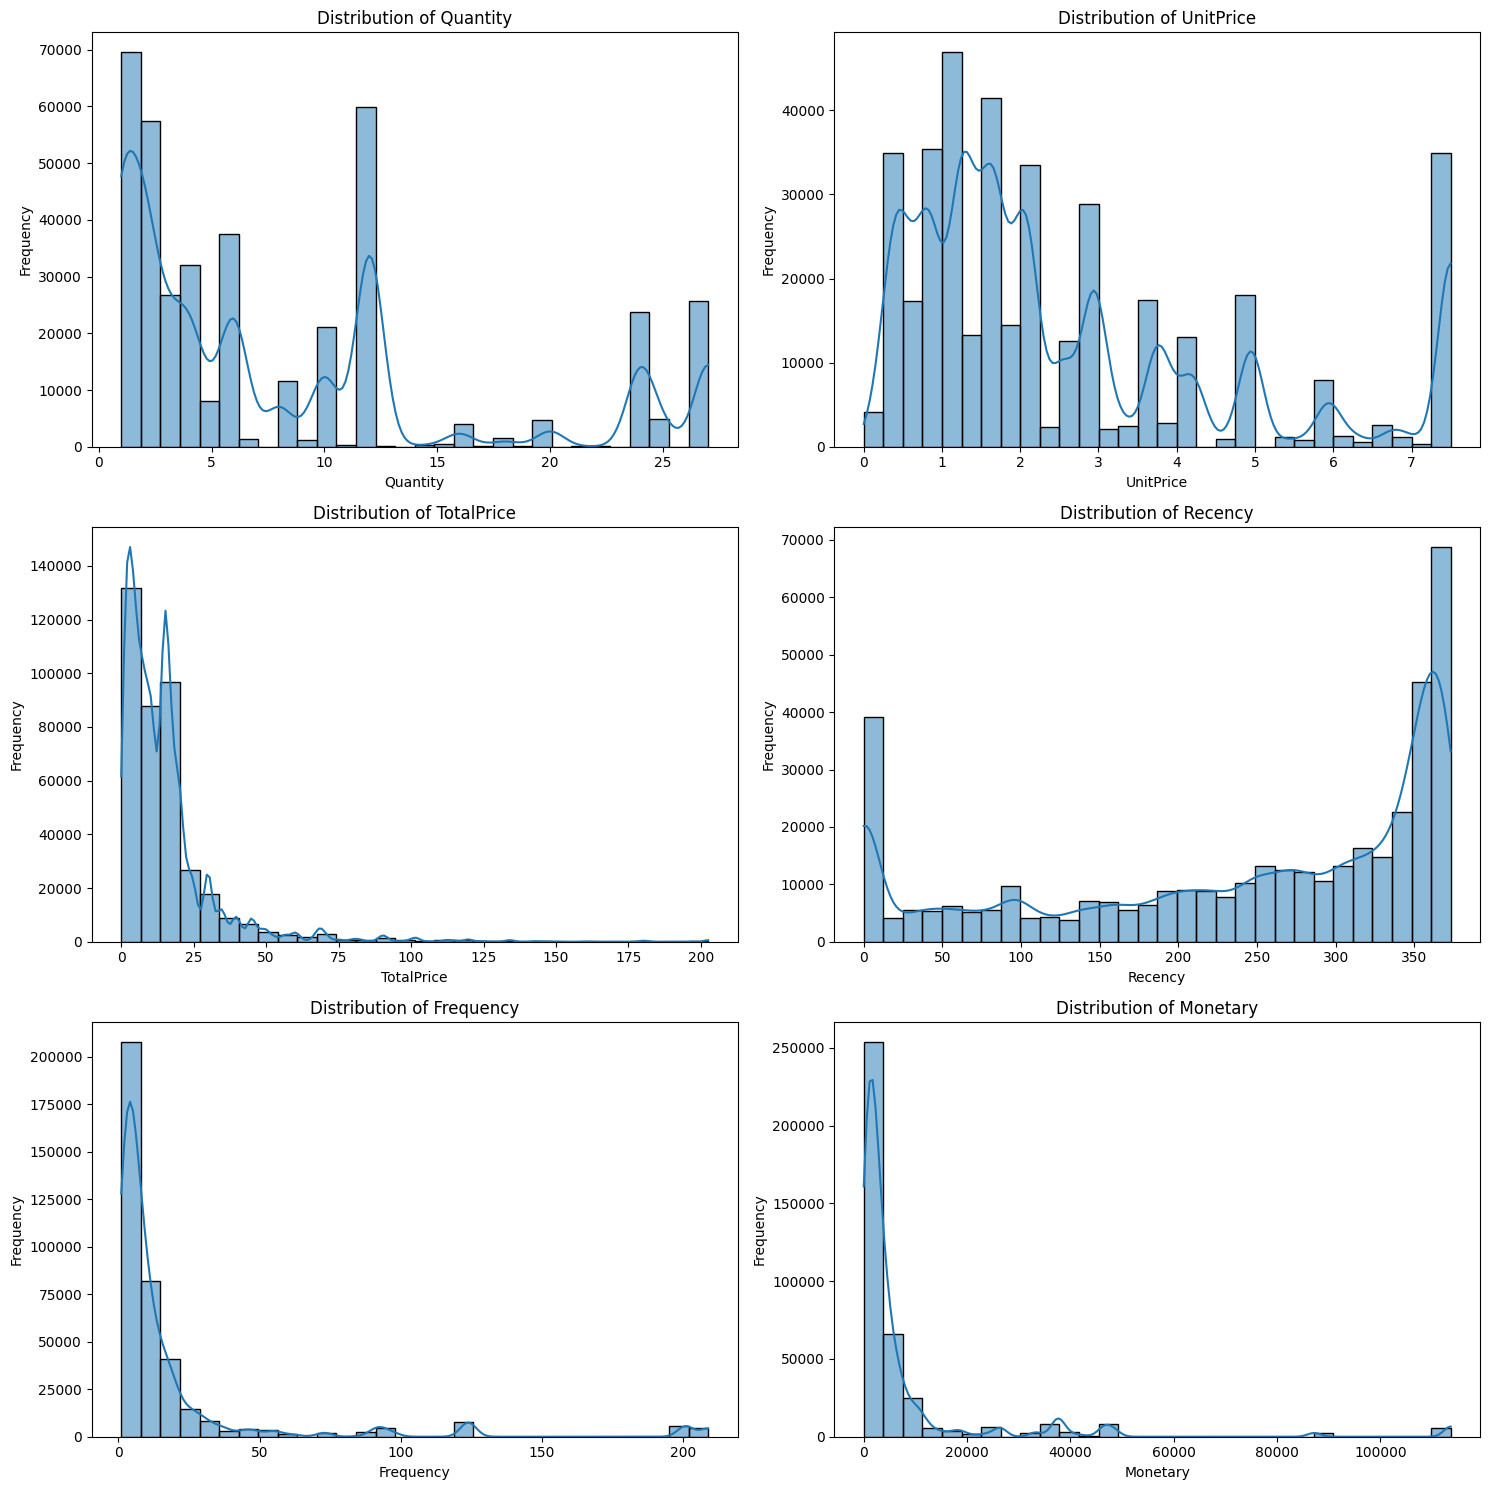

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Visualize distributions of key numeric variables
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# List of columns to visualize
columns = ['Quantity', 'UnitPrice', 'TotalPrice', 'Recency', 'Frequency', 'Monetary']

for i, column in enumerate(columns):
    ax = axes[i//2, i%2]
    sns.histplot(data_target_variable_dropped[column], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

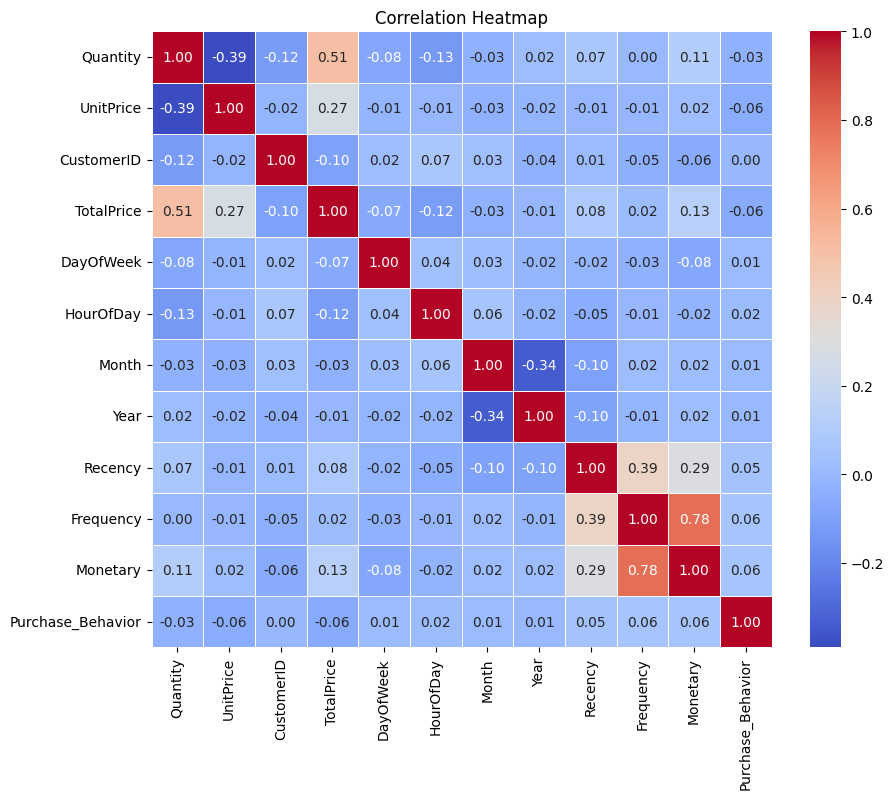

In [31]:
# Step 3: Dropping the non-numeric 'Customer_Segment' column before calculating correlation
data_numeric = data_target_variable_dropped.drop(columns=['Customer_Segment'])

# Generating the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data_numeric.corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder

data_label_encoded = data_target_variable_dropped.copy()
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to Customer_Segment
data_label_encoded['Customer_Segment'] = label_encoder.fit_transform(data_label_encoded['Customer_Segment'])

# Check the encoded values
print(data_label_encoded[['Customer_Segment']].head())


       Customer_Segment
36521                 2
10256                 1
10257                 1
10258                 1
10259                 1


In [33]:
print(data_label_encoded.head())
print(data_label_encoded.info())

       Quantity  UnitPrice  CustomerID  TotalPrice  DayOfWeek  HourOfDay  \
36521        27       1.04     12346.0       28.08          1         10   
10256        12       2.10     12347.0       25.20          1         14   
10257         4       4.25     12347.0       17.00          1         14   
10258        12       3.25     12347.0       39.00          1         14   
10259        27       0.65     12347.0       17.55          1         14   

       Month  Year  Recency  Frequency  Monetary  Customer_Segment  \
36521      1  2011        0          1     28.08                 2   
10256     12  2010      365          7   3877.44                 1   
10257     12  2010      365          7   3877.44                 1   
10258     12  2010      365          7   3877.44                 1   
10259     12  2010      365          7   3877.44                 1   

       Purchase_Behavior  
36521                  0  
10256                  1  
10257                  1  
10258         

In [34]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the original dataframe to maintain the original intact
data_standardised = data_label_encoded.copy()

# Select numerical features to standardize
numerical_features = ['Quantity', 'UnitPrice', 'TotalPrice', 'Recency', 'Frequency', 'Monetary']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the numerical columns
data_standardised[numerical_features] = scaler.fit_transform(data_standardised[numerical_features])

# Check the first few rows of the standardized dataframe
print(data_standardised[numerical_features].head())


       Quantity  UnitPrice  TotalPrice   Recency  Frequency  Monetary
36521  2.294565  -0.741730    0.731748 -1.898787  -0.476932 -0.452126
10256  0.444788  -0.238447    0.568545  0.991530  -0.316044 -0.227892
10257 -0.541760   0.782364    0.103870  0.991530  -0.316044 -0.227892
10258  0.444788   0.307568    1.350558  0.991530  -0.316044 -0.227892
10259  2.294565  -0.926900    0.135038  0.991530  -0.316044 -0.227892


In [35]:
# Verify the mean and standard deviation after standardization
standardized_stats = data_standardised.describe().loc[['mean', 'std']]
print(standardized_stats)

          Quantity     UnitPrice    CustomerID    TotalPrice  DayOfWeek  \
mean  3.126669e-17 -7.092906e-18  15287.843865 -2.220514e-16   2.606911   
std   1.000001e+00  1.000001e+00   1713.539549  1.000001e+00   1.923929   

      HourOfDay     Month         Year       Recency     Frequency  \
mean  12.721532  7.601871  2010.934631 -7.642968e-17 -9.843217e-17   
std    2.276661  3.415015     0.247177  1.000001e+00  1.000001e+00   

          Monetary  Customer_Segment  Purchase_Behavior  
mean -4.632102e-17          1.292955           0.974349  
std   1.000001e+00          0.456777           0.158092  


In [36]:
print(data_standardised[numerical_features].head())
print(data_standardised.head())
print(data_standardised.info())

       Quantity  UnitPrice  TotalPrice   Recency  Frequency  Monetary
36521  2.294565  -0.741730    0.731748 -1.898787  -0.476932 -0.452126
10256  0.444788  -0.238447    0.568545  0.991530  -0.316044 -0.227892
10257 -0.541760   0.782364    0.103870  0.991530  -0.316044 -0.227892
10258  0.444788   0.307568    1.350558  0.991530  -0.316044 -0.227892
10259  2.294565  -0.926900    0.135038  0.991530  -0.316044 -0.227892
       Quantity  UnitPrice  CustomerID  TotalPrice  DayOfWeek  HourOfDay  \
36521  2.294565  -0.741730     12346.0    0.731748          1         10   
10256  0.444788  -0.238447     12347.0    0.568545          1         14   
10257 -0.541760   0.782364     12347.0    0.103870          1         14   
10258  0.444788   0.307568     12347.0    1.350558          1         14   
10259  2.294565  -0.926900     12347.0    0.135038          1         14   

       Month  Year   Recency  Frequency  Monetary  Customer_Segment  \
36521      1  2011 -1.898787  -0.476932 -0.452126   

In [37]:
from sklearn.model_selection import train_test_split

# Step 1: Prepare features (X) and target (Y)
X = data_standardised.drop(columns=['Purchase_Behavior', 'Customer_Segment'])  # Drop target and non-relevant features
y = data_standardised['Purchase_Behavior']  # Target variable

# Step 2: Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print(f"Training set size: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set size: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set size: X_train: (314153, 11), y_train: (314153,)
Test set size: X_test: (78539, 11), y_test: (78539,)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 3: Create and train Logistic Regression model
logreg_model = LogisticRegression(max_iter=500,random_state=42)

# Fit the model
logreg_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])  # For ROC-AUC, we need probabilities

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Output the evaluation metrics
print(f"Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Confusion Matrix:\n{cm}")

Logistic Regression Model Evaluation:
Accuracy: 0.9746
Precision: 0.9746
Recall: 1.0000
F1-Score: 0.9871
ROC-AUC: 0.7357
Confusion Matrix:
[[    0  1995]
 [    0 76544]]


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Create and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Step 3: Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])  # For ROC-AUC, we need probabilities

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Output the evaluation metrics
print(f"Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")
print(f"Confusion Matrix:\n{cm_rf}")

Random Forest Model Evaluation:
Accuracy: 0.9693
Precision: 0.9749
Recall: 0.9941
F1-Score: 0.9844
ROC-AUC: 0.6976
Confusion Matrix:
[[   39  1956]
 [  453 76091]]


In [41]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.4 MB/s eta 0:00:00


In [42]:
import xgboost as xgb

# Step 1: Create and train XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Step 3: Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])  # For ROC-AUC, we need probabilities

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Output the evaluation metrics
print(f"XGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"ROC-AUC: {roc_auc_xgb:.4f}")
print(f"Confusion Matrix:\n{cm_xgb}")

XGBoost Model Evaluation:
Accuracy: 0.9746
Precision: 0.9753
Recall: 0.9993
F1-Score: 0.9871
ROC-AUC: 0.7787
Confusion Matrix:
[[   58  1937]
 [   55 76489]]


In [43]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.9 MB/s eta 0:00:00


In [44]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Step 1: Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, cat_features=[], random_seed=42, verbose=100)

# Step 2: Train the model
catboost_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Step 4: Evaluate the model
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
precision_catboost = precision_score(y_test, y_pred_catboost)
recall_catboost = recall_score(y_test, y_pred_catboost)
f1_catboost = f1_score(y_test, y_pred_catboost)
roc_auc_catboost = roc_auc_score(y_test, catboost_model.predict_proba(X_test)[:, 1])  # For ROC-AUC, we need probabilities

# Confusion matrix
cm_catboost = confusion_matrix(y_test, y_pred_catboost)

# Output the evaluation metrics
print(f"CatBoost Model Evaluation:")
print(f"Accuracy: {accuracy_catboost:.4f}")
print(f"Precision: {precision_catboost:.4f}")
print(f"Recall: {recall_catboost:.4f}")
print(f"F1-Score: {f1_catboost:.4f}")
print(f"ROC-AUC: {roc_auc_catboost:.4f}")
print(f"Confusion Matrix:\n{cm_catboost}")

0:	learn: 0.5246915	total: 72.8ms	remaining: 36.3s
100:	learn: 0.1016409	total: 2.53s	remaining: 9.99s
200:	learn: 0.1002486	total: 4.88s	remaining: 7.26s
300:	learn: 0.0993895	total: 7.04s	remaining: 4.65s
400:	learn: 0.0985815	total: 9.19s	remaining: 2.27s
499:	learn: 0.0978748	total: 11.3s	remaining: 0us
CatBoost Model Evaluation:
Accuracy: 0.9746
Precision: 0.9751
Recall: 0.9994
F1-Score: 0.9871
ROC-AUC: 0.7947
Confusion Matrix:
[[   41  1954]
 [   43 76501]]


In [46]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10, 12],
    'l2_leaf_reg': [1, 3, 5, 7, 10],
    'bagging_temperature': [0, 0.5, 1, 1.5],
    'border_count': [32, 64, 128, 255]
}

# Initialize CatBoost Classifier
catboost_model = CatBoostClassifier(cat_features=[], random_state=42, verbose=0)

# Perform RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(catboost_model, param_distributions=param_dist,
                                   n_iter=10, scoring='roc_auc', cv=5,
                                   random_state=42, n_jobs=-1)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Best hyperparameters found
best_params = random_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Train the optimized model using the best parameters
best_catboost_model = CatBoostClassifier(**best_params, random_state=42, verbose=0)
best_catboost_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred_optimized = best_catboost_model.predict(X_test)

# Step 6: Evaluate the optimized model
accuracy = accuracy_score(y_test, y_pred_optimized)
precision = precision_score(y_test, y_pred_optimized)
recall = recall_score(y_test, y_pred_optimized)
f1 = f1_score(y_test, y_pred_optimized)
roc_auc = roc_auc_score(y_test, best_catboost_model.predict_proba(X_test)[:, 1])  # For ROC-AUC, we need probabilities

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_optimized)

# Output the evaluation metrics
print(f"Optimized CatBoost Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Confusion Matrix:\n{cm}")

Best hyperparameters: {'learning_rate': 0.01, 'l2_leaf_reg': 3, 'iterations': 1000, 'depth': 8, 'border_count': 255, 'bagging_temperature': 1}
Optimized CatBoost Model Evaluation:
Accuracy: 0.9747
Precision: 0.9750
Recall: 0.9998
F1-Score: 0.9872
ROC-AUC: 0.7946
Confusion Matrix:
[[   29  1966]
 [   18 76526]]


In [47]:
# Assuming categorical features are specified correctly
# Identify categorical columns (e.g., 'DayOfWeek', 'Month', etc.)
cat_features = ['DayOfWeek', 'Month']  # List only the actual categorical features in your dataset

# Convert the categorical features to integers or strings if needed
# For example, let's assume 'DayOfWeek' and 'Month' are categorical
X_train[cat_features] = X_train[cat_features].astype('str')  # Convert to strings for CatBoost

# Initialize CatBoost with the best hyperparameters
catboost_final_model = CatBoostClassifier(
    learning_rate=best_params['learning_rate'],  # Use 'best_params' instead of 'best_params_catboost'
    l2_leaf_reg=best_params['l2_leaf_reg'],
    iterations=best_params['iterations'],
    depth=best_params['depth'],
    border_count=best_params['border_count'],
    bagging_temperature=best_params['bagging_temperature'],
    random_state=42,
    cat_features=cat_features  # Pass only valid categorical features
)

# Train the model on the full training data
catboost_final_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_final = catboost_final_model.predict(X_test)

# Evaluation metrics
accuracy_final = accuracy_score(y_test, y_pred_final)
precision_final = precision_score(y_test, y_pred_final)
recall_final = recall_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final)
roc_auc_final = roc_auc_score(y_test, catboost_final_model.predict_proba(X_test)[:, 1])  # For ROC-AUC, we need probabilities

# Confusion matrix
cm_final = confusion_matrix(y_test, y_pred_final)

# Output the final evaluation metrics
print(f"Final CatBoost Model Evaluation:")
print(f"Accuracy: {accuracy_final:.4f}")
print(f"Precision: {precision_final:.4f}")
print(f"Recall: {recall_final:.4f}")
print(f"F1-Score: {f1_final:.4f}")
print(f"ROC-AUC: {roc_auc_final:.4f}")
print(f"Confusion Matrix:\n{cm_final}")


0:	learn: 0.6746660	total: 170ms	remaining: 2m 49s
1:	learn: 0.6560714	total: 372ms	remaining: 3m 5s
2:	learn: 0.6393894	total: 567ms	remaining: 3m 8s
3:	learn: 0.6218095	total: 776ms	remaining: 3m 13s
4:	learn: 0.6057462	total: 969ms	remaining: 3m 12s
5:	learn: 0.5893664	total: 1.17s	remaining: 3m 13s
6:	learn: 0.5735708	total: 1.36s	remaining: 3m 12s
7:	learn: 0.5585645	total: 1.55s	remaining: 3m 12s
8:	learn: 0.5439191	total: 1.73s	remaining: 3m 10s
9:	learn: 0.5304163	total: 1.85s	remaining: 3m 3s
10:	learn: 0.5167546	total: 2.05s	remaining: 3m 3s
11:	learn: 0.5043613	total: 2.23s	remaining: 3m 3s
12:	learn: 0.4927867	total: 2.33s	remaining: 2m 56s
13:	learn: 0.4804972	total: 2.47s	remaining: 2m 54s
14:	learn: 0.4684796	total: 2.66s	remaining: 2m 54s
15:	learn: 0.4580560	total: 2.77s	remaining: 2m 50s
16:	learn: 0.4471470	total: 2.95s	remaining: 2m 50s
17:	learn: 0.4368401	total: 3.13s	remaining: 2m 50s
18:	learn: 0.4270966	total: 3.34s	remaining: 2m 52s
19:	learn: 0.4175260	total:

In [48]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define your file path with no spaces and correct format
file_path = '/content/drive/MyDrive/Ml_e_commerce_catboost_model_0'  # Change the path here

# Create the folder if it doesn't exist
if not os.path.exists(file_path):
    os.makedirs(file_path)

# Save the CatBoost model
catboost_final_model.save_model(os.path.join(file_path, 'catboost_model'))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


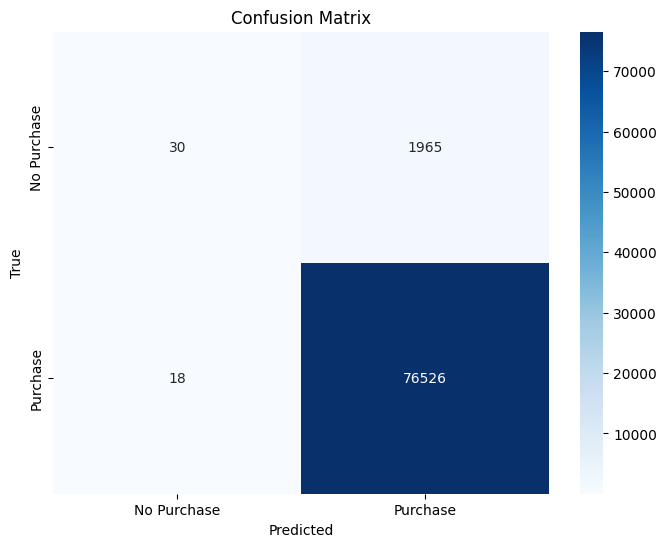

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined (y_pred is the predicted labels)
y_pred = catboost_final_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


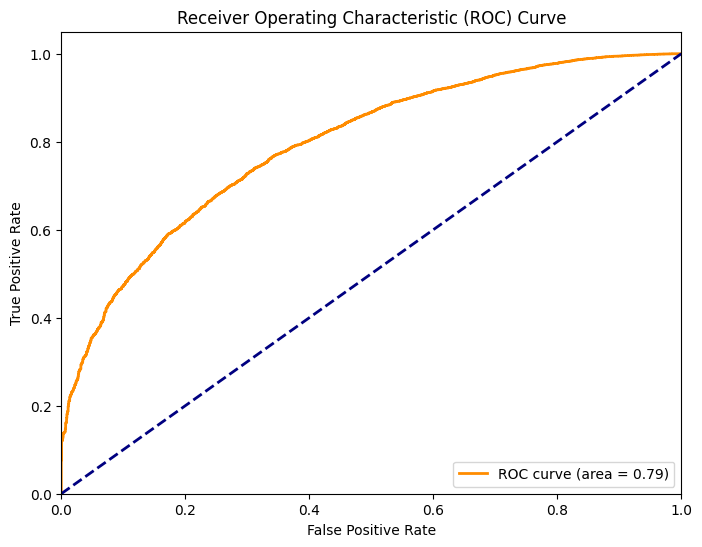

In [50]:
from sklearn.metrics import roc_curve, auc

# Get probabilities for the positive class (purchase class)
y_probs = catboost_final_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


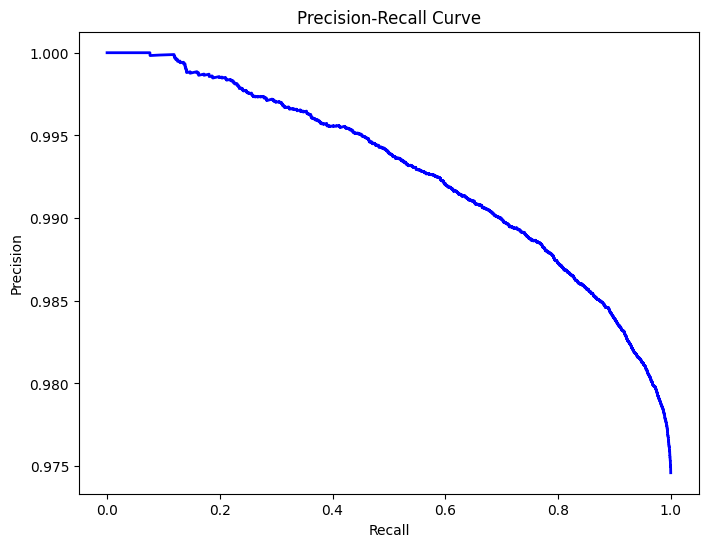

In [51]:
from sklearn.metrics import precision_recall_curve

# Get precision-recall curve data
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


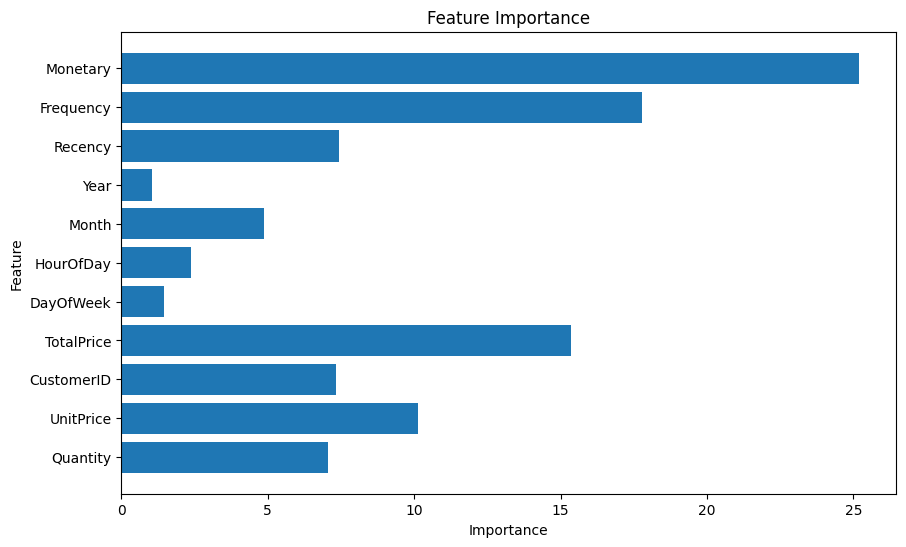

In [52]:
# Get feature importances
feature_importances = catboost_final_model.get_feature_importance()

# Create a bar plot for feature importances
features = X_train.columns  # Assuming X_train is a DataFrame
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
